<a href="https://colab.research.google.com/github/Lou1108/DeepLearning/blob/main/laser_prediction_nn_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [166]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, GRU, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import random

In [167]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

## Data Loading

In [125]:
data_train = loadmat('/content/drive/MyDrive/Deep Learning/Xtrain.mat')['Xtrain']
data_test = loadmat('/content/drive/MyDrive/Deep Learning/Xtest.mat')['Xtest']
#As requested in point a) we scale the data, preparing it for the neural network.
scaler = MinMaxScaler(feature_range=(0, 1))
data_train_scaled = scaler.fit_transform(data_train)
y_test = scaler.transform(data_test)

Converting time series into supervised learning format. It uses a sliding window (time_step) for one-step-ahead prediction

In [126]:
def create_dataset(data, time_step): #supervised format
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [127]:
X, y = create_dataset(data_train_scaled, 120)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Model Training
Training 3 different models (RNN, LSTM, and GRU) on the given test data to compare the errors.

Trying different time steps, as requested in point b) to tune for each of the different models the best performance and of all models the best one.

In [169]:
time_steps=list(range(25, 151, 25))
results_RNN = []
print("Training the RNN")
for ts in time_steps:
    X, y = create_dataset(data_train_scaled, ts)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model_rnn = Sequential()
    model_rnn.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model_rnn.add(SimpleRNN(units=100))
    model_rnn.add(Dense(units=1))
    early_stop = EarlyStopping(monitor='loss', patience=5)
    model_rnn.compile(optimizer='adam', loss='mean_squared_error')

    model_rnn.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

    predictions = model_rnn.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse = mean_squared_error(y_test_scaled, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled, predictions)
    results_RNN.append([ts, mse, rmse, mae])

results_LSTM=[]
print("Training the LSTM")
for ts in time_steps:
    X, y = create_dataset(data_train_scaled, ts)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model_lstm.add(LSTM(units=50))
    model_lstm.add(Dense(units=1))

    early_stop = EarlyStopping(monitor='loss', patience=5)
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')
    model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

    predictions = model_lstm.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse = mean_squared_error(y_test_scaled, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_scaled, predictions)
    results_LSTM.append([ts, mse, rmse, mae])

results_GRU = []
print("Training the GRU")
for ts in time_steps:
  X, y = create_dataset(data_train_scaled, ts)
  X = X.reshape(X.shape[0], X.shape[1], 1) #3D reshaping

  train_size = int(len(X) * 0.8)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]

  model_GRU = Sequential()
  model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model_GRU.add(GRU(units=50))
  model_GRU.add(Dense(units=1))
  model_GRU.compile(optimizer='adam', loss='mean_squared_error')
  early_stop = EarlyStopping(monitor='loss', patience=5)
  model_GRU.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

  predictions = model_GRU.predict(X_test)
  predictions = scaler.inverse_transform(predictions)
  y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

  mse = mean_squared_error(y_test_scaled, predictions)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test_scaled, predictions)
  results_GRU.append([ts, mse, rmse, mae])


Training the RNN
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2382
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0133
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0090
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0083
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0086
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0084
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0081
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0078
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0074
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0070
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0066
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0063
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0060
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0058
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3005
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0213
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0151
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0095
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0079
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0070
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0063
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0062
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0060
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0059
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0058
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0055
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0051
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0047
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0045
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3837
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0218
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0110
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0072
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0065
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0061
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0063
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0053
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0057
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0053
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0052
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0048
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0048
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0045
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0047
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0813
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0168
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0118
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0163
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0156
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0200
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0121
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0109
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0101
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0088
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0092
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0092
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0086
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0093
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0083
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.1165
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0140
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0099
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0082
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0081
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0084
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0085
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0084
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0081
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.1777
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0158
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0157
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0151
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0134
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0126
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0120
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0175
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0149
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0093
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0102
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0104
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0089
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0093
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0089
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0551
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0318
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0308
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0297
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0278
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0237
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0176
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0177
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0176
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0158
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0151
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0131
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0464
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0350
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0343
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0333
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0308
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0252
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0163
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0137
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0123
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0120
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0115
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0111
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0108
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0105
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0102
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0484
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0354
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0341
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0330
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0316
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0290
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0233
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0154
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0134
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0118
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0109
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0106
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0101
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0096
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0091
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0557
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0388
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0381
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0372
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0360
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0337
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0285
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0178
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0155
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0134
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0127
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0120
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0114
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0107
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0102
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0560
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0413
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0406
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0382
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0370
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0360
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0339
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0291
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0206
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0158
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0146
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0138
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0128
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0122
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0119
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0450
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0354
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0343
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0332
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0322
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0302
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0270
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0220
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0179
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0162
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0155
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0152
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0149
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0146
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0142
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0447
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0296
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0190
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0114
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0103
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0096
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0085
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0069
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0059
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0055
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0052
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0489
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0340
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0261
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0146
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0127
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0117
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0110
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0104
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0097
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0089
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0077
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0062
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0049
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0044
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0041
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0537
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0327
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0247
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0139
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0123
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0107
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0102
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0097
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0092
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0085
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0076
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0063
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0047
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0037
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - lo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0588
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0382
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0319
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0218
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0142
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0133
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0124
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0119
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0112
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0105
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0094
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0080
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0062
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0053
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0049
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0544
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0404
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0318
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0202
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0129
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0127
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0123
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0119
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0114
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0108
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0100
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0089
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0077
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0069
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0064
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0496
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0342
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0280
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.0192
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0147
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0138
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.0136
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0132
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0129
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0126
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0122
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0114
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0101
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0085
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step -

### Results of the model training
For finetuning the window size

In [170]:
# display the results of all three models
df_rnn = pd.DataFrame(results_RNN, columns=["time_step", "MSE", "RMSE", "MAE"])
df_lstm = pd.DataFrame(results_LSTM, columns=["time_step", "MSE", "RMSE", "MAE"])
df_gru = pd.DataFrame(results_GRU, columns=["time_step", "MSE", "RMSE", "MAE"])

print("RNN results:\n", df_rnn)
print("\nLSTM results:\n", df_lstm)
print("\nGRU results:\n", df_gru)

RNN results:
    time_step         MSE       RMSE        MAE
0         25   51.846551   7.200455   5.738737
1         50   94.125463   9.701828   7.619976
2         75  248.616291  15.767571  12.675315
3        100  187.618302  13.697383  12.033598
4        125  169.481910  13.018522   9.797390
5        150  609.673269  24.691563  21.957866

LSTM results:
    time_step        MSE      RMSE       MAE
0         25   7.937530  2.817362  2.131514
1         50  17.904481  4.231369  3.787625
2         75  14.472766  3.804309  3.249818
3        100  60.559603  7.782005  6.446750
4        125  15.769988  3.971144  3.327412
5        150  60.664652  7.788752  6.778099

GRU results:
    time_step        MSE      RMSE       MAE
0         25   8.769418  2.961320  2.120513
1         50   7.905282  2.811633  2.255229
2         75  17.821348  4.221534  3.471253
3        100   6.776801  2.603229  2.065242
4        125   5.884752  2.425851  1.813945
5        150  19.300482  4.393231  3.859628


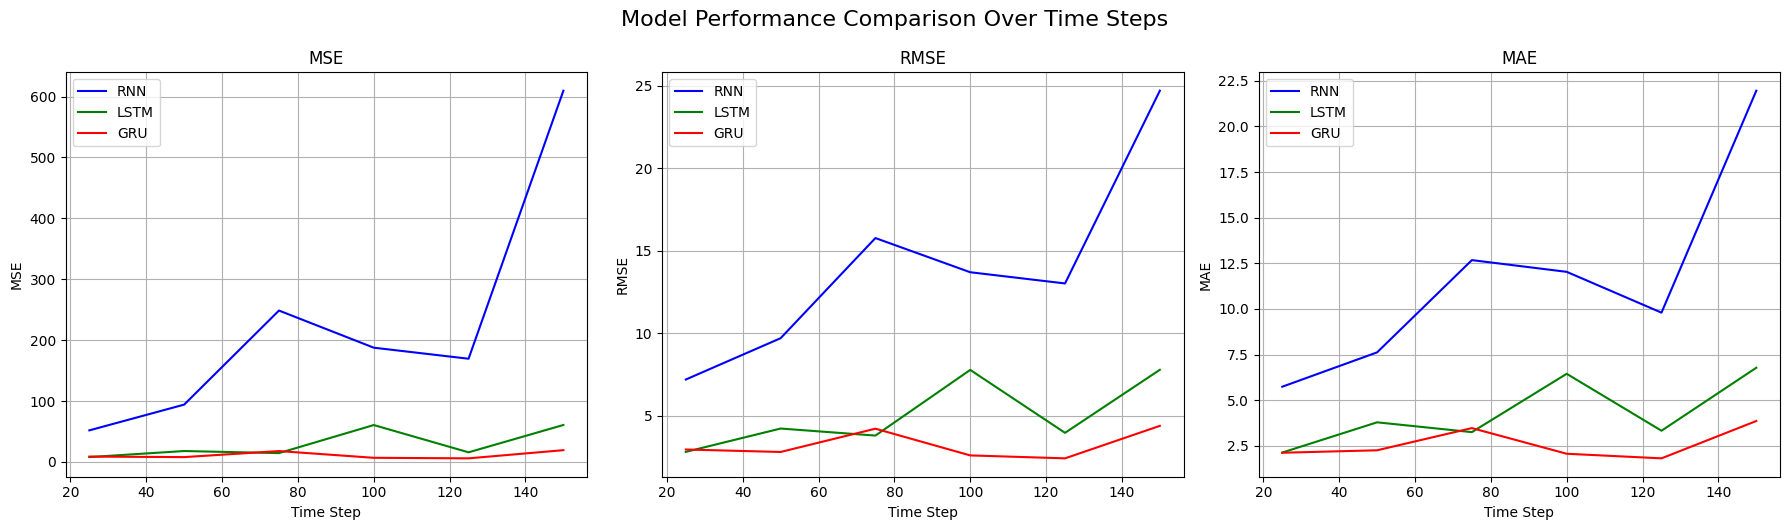

In [171]:
# create mappings for models
models = {"RNN": df_rnn, "LSTM": df_lstm, "GRU": df_gru}
colors = {"RNN": "blue", "LSTM": "green", "GRU": "red"}

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
for idx, metric in enumerate(["MSE", "RMSE", "MAE"]):
    ax = axes[idx]
    for model_name, df in models.items():
        ax.plot(df["time_step"], df[metric], label=model_name, color=colors[model_name])
    ax.set_title(metric)
    ax.set_xlabel("Time Step")
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.suptitle("Model Performance Comparison Over Time Steps", fontsize=16, y=1.05)
# plt.savefig("ModelPerformanceComparison.jpg")
plt.show()

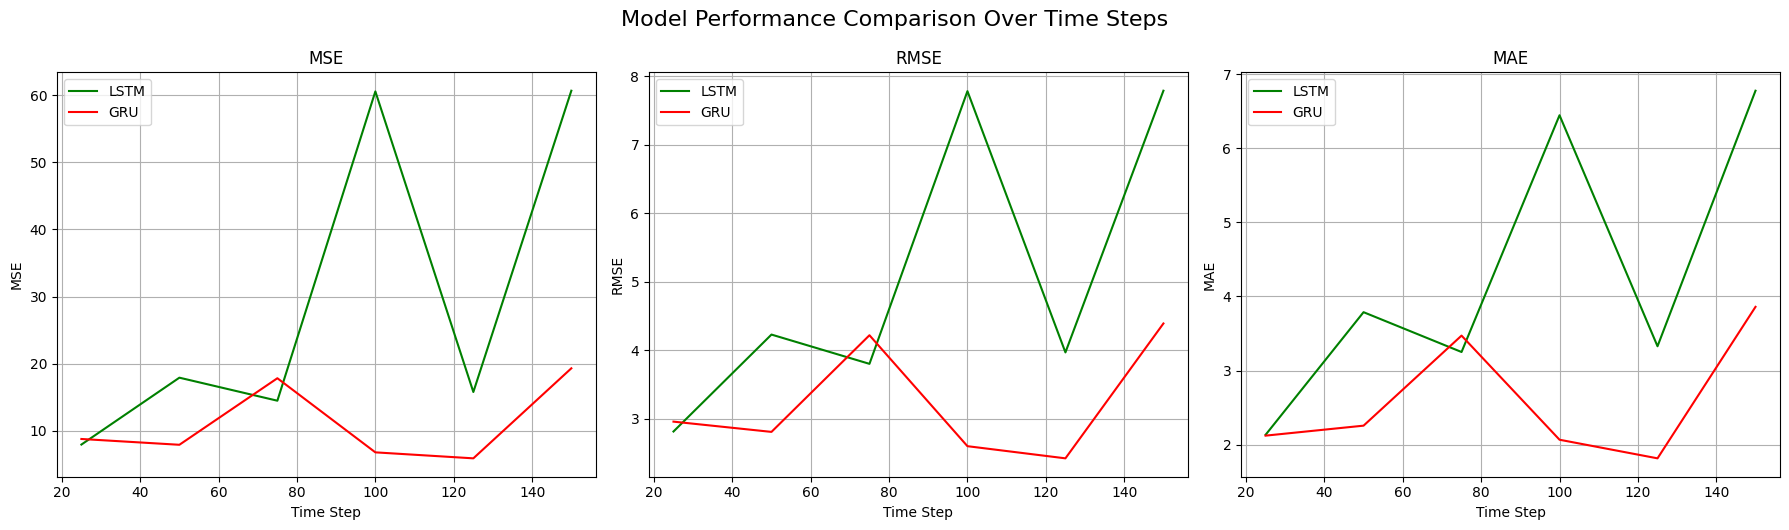

In [172]:
# create mappings for models
models = { "LSTM": df_lstm, "GRU": df_gru}
colors = { "LSTM": "green", "GRU": "red"}

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
for idx, metric in enumerate(["MSE", "RMSE", "MAE"]):
    ax = axes[idx]
    for model_name, df in models.items():
        ax.plot(df["time_step"], df[metric], label=model_name, color=colors[model_name])
    ax.set_title(metric)
    ax.set_xlabel("Time Step")
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.suptitle("Model Performance Comparison Over Time Steps", fontsize=16, y=1.05)
# plt.savefig("ModelPerformanceComparison.jpg")
plt.show()

### Fine-tuning the window size for GRU

In [191]:
time_steps=list(range(75, 156, 10))
results_GRU = []
print("GRU")
for ts in time_steps:
  X, y = create_dataset(data_train_scaled, ts)
  X = X.reshape(X.shape[0], X.shape[1], 1) #3D reshaping

  train_size = int(len(X) * 0.8)
  X_train, X_test = X[:train_size], X[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]

  model_GRU = Sequential()
  model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model_GRU.add(GRU(units=50))
  model_GRU.add(Dense(units=1))
  model_GRU.compile(optimizer='adam', loss='mean_squared_error')
  early_stop = EarlyStopping(monitor='loss', patience=5)
  model_GRU.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

  predictions = model_GRU.predict(X_test)
  predictions = scaler.inverse_transform(predictions)
  y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

  mse = mean_squared_error(y_test_scaled, predictions)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test_scaled, predictions)
  results_GRU.append([ts, mse, rmse, mae])

df_gru = pd.DataFrame(results_GRU, columns=["time_step", "MSE", "RMSE", "MAE"])

print("\nGRU results:\n", df_gru)

GRU
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0475
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0334
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0252
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0127
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0117
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0102
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0097
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0090
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0083
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0073
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0060
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0045
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0036
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0032
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0030
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0618
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0365
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0310
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0220
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0148
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0138
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0127
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0121
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0113
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0104
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0092
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0076
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0060
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0051
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0047
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0461
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0360
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0292
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0174
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0130
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0123
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0118
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0111
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0099
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0079
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0057
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0050
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0045
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0041
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0039
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0527
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0348
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0272
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0162
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0129
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0123
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0118
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0112
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0104
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0093
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0077
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0058
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0049
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0044
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0041
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0481
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0342
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0252
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0156
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0143
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0132
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0128
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0123
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0117
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0110
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0100
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0085
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0070
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0064
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0060
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0551
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0411
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0330
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0213
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0132
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0128
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0122
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0118
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0112
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0105
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0095
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0082
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0070
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0064
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0057
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0417
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0285
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0181
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0127
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0125
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0110
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0107
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0100
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0093
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0083
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0069
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0051
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0044
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0042
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0569
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0381
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0302
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0209
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0137
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0129
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0123
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0118
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0113
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0107
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0098
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0084
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0066
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0055
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 0.0435
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0317
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0263
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0159
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0144
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0124
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0122
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0116
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0112
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0107
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.0100
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0092
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0080
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0066
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step -

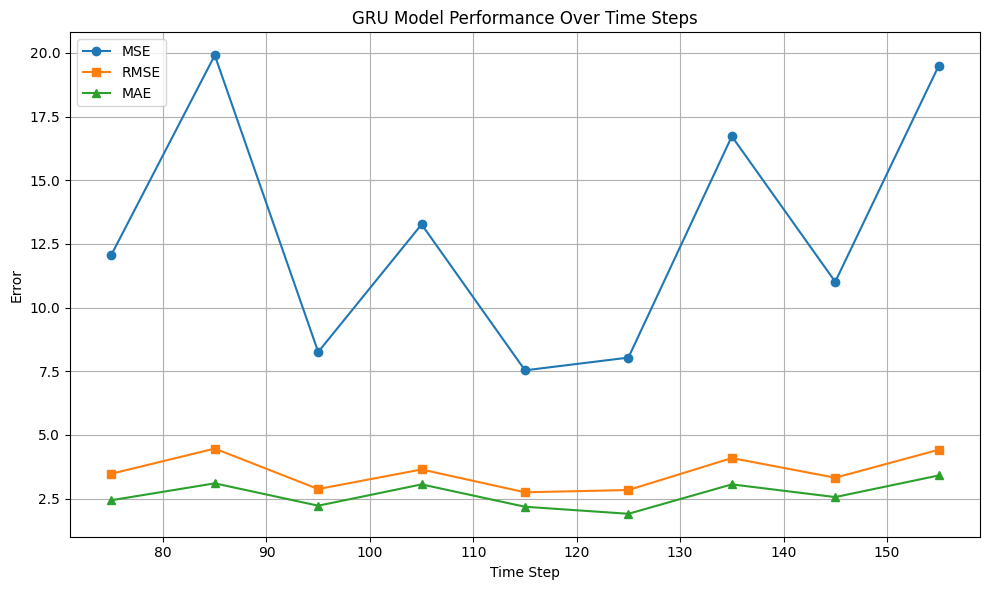

In [192]:
plt.figure(figsize=(10, 6))
plt.plot(df_gru["time_step"], df_gru["MSE"], marker='o', label='MSE')
plt.plot(df_gru["time_step"], df_gru["RMSE"], marker='s', label='RMSE')
plt.plot(df_gru["time_step"], df_gru["MAE"], marker='^', label='MAE')

plt.title("GRU Model Performance Over Time Steps")
plt.xlabel("Time Step")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig("GRUPerformance.jpg")
plt.show()

## Train GRU model on the best hyperparameters

In [195]:
best_ts=115
X_train, y_train = create_dataset(data_train_scaled, best_ts) #with the best fine-tuned time step = 125
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [196]:
# Define and compile the model
model_GRU = Sequential()
model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_GRU.add(GRU(units=50))
model_GRU.add(Dense(units=1))
model_GRU.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
early_stop = EarlyStopping(monitor='loss', patience=5)
model_GRU.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0523
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0333
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0228
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0104
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0099
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0089
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0085
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0079
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0070
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0058
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0043
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0034
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0031
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0028
Epoch 15/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - lo

<ipython-input-197-ebae833b3b08>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


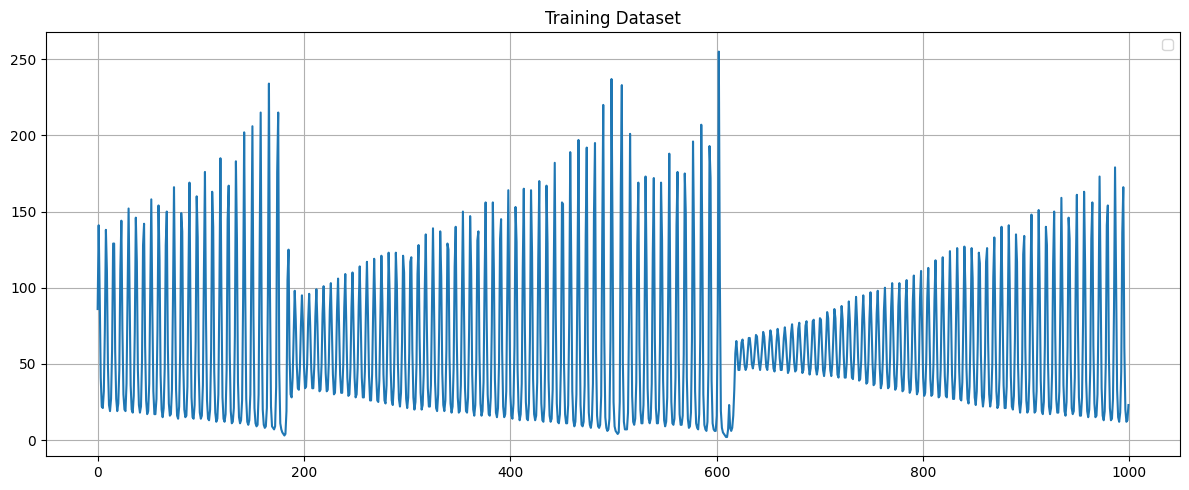

In [197]:
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(data_train)), data_train)
plt.legend()
plt.title("Training Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()

## Recursive prediction
As stated in assignment c, the best model (GRU) is used to predict 200 steps recursively using the previsouly determined best time-step.


In [198]:
time_step = 115
last_input = y_train[-time_step:].reshape(1, time_step, 1)

# Step 3: Recursive prediction for 200 steps
recursive_preds = []
for _ in range(200):
    next_pred = model_GRU.predict(last_input)[0, 0]
    recursive_preds.append(next_pred)
    last_input = np.append(last_input[:, 1:, :], [[[next_pred]]], axis=1)

recursive_preds_scaled = scaler.inverse_transform(np.array(recursive_preds).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

plot to show the last 150 known values from the test set (in blue) followed by the 200 recursively predicted future steps (in orange).

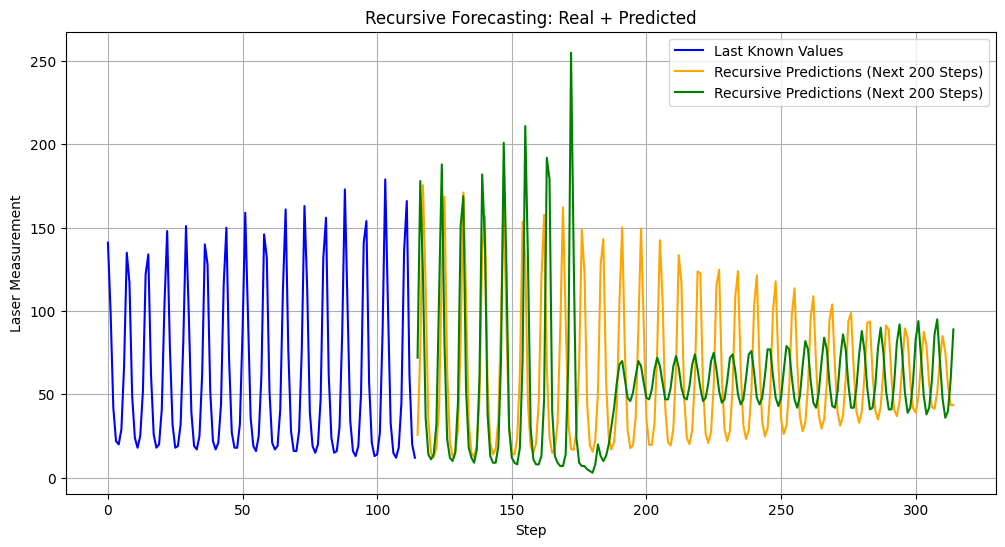

In [199]:
true_window = scaler.inverse_transform(X_train[-1].reshape(-1, 1))
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(true_window)), true_window, label="Last Known Values", color='blue')
plt.plot(np.arange(len(true_window), len(true_window) + len(recursive_preds_scaled)),
         recursive_preds_scaled, label="Recursive Predictions (Next 200 Steps)", color='orange')
plt.plot(np.arange(len(true_window), len(true_window) + len(recursive_preds_scaled)),
         data_test, label="Recursive Predictions (Next 200 Steps)", color='green')
plt.xlabel("Step")
plt.ylabel("Laser Measurement")
plt.title("Recursive Forecasting: Real + Predicted")
plt.legend()
plt.grid(True)
#plt.savefig("RecursiveForecastingRealANDPredicted.jpg")
plt.show()

In [200]:
mae = np.mean(np.abs(recursive_preds_scaled - data_test))
mse = np.mean((recursive_preds_scaled - data_test) ** 2)
print("MAE:", mae)
print("MSE:", mse)

MAE: 38.23439
MSE: 2565.3496


In [203]:
2565.3496**(1/2)

50.64928035026757

GRU with harmonic time encoding

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 0.0676
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0495
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0404
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0408
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0374
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0349
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0340
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0302
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0272
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0260
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0247
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0211
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0190
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0191
Epoch 15/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0166


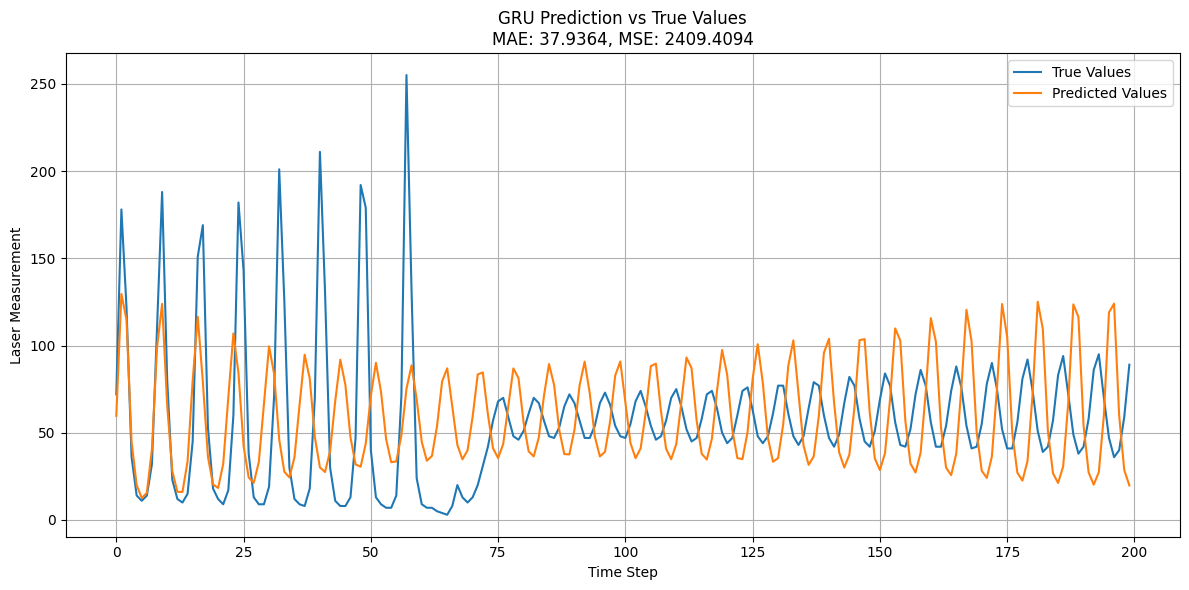

In [202]:
train_scaled = scaler.fit_transform(data_train.reshape(-1, 1)).flatten()
window_size = 115
period = 400

# Create input sequences
def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        t = np.arange(i, i + window)
        sin_t = np.sin(2 * np.pi * t / period)
        cos_t = np.cos(2 * np.pi * t / period)
        sin2_t = np.sin(4 * np.pi * t / period)
        cos2_t = np.cos(4 * np.pi * t / period)
        seq = np.vstack((data[i:i+window], sin_t, cos_t, sin2_t, cos2_t)).T
        X.append(seq)
        y.append(data[i + window])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, window_size)

model = Sequential([
    GRU(64, return_sequences=True, input_shape=(window_size, 5)),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

input_seq = train_scaled[-window_size:].copy()
predictions = []

for i in range(200):
    t = np.arange(len(train_scaled) + i - window_size, len(train_scaled) + i)
    sin_t = np.sin(2 * np.pi * t / period)
    cos_t = np.cos(2 * np.pi * t / period)
    sin2_t = np.sin(4 * np.pi * t / period)
    cos2_t = np.cos(4 * np.pi * t / period)
    input_features = np.vstack((input_seq, sin_t, cos_t, sin2_t, cos2_t)).T.reshape(1, window_size, 5)
    pred = model.predict(input_features, verbose=0)[0, 0]
    predictions.append(pred)
    input_seq = np.append(input_seq, pred)[-window_size:]

print("Sample raw predictions:", predictions[:5])

# Clip predictions to [0, 1] to avoid inverse scaling distortions
pred_clipped = np.clip(predictions, 0, 1)
predicted_values = scaler.inverse_transform(np.array(pred_clipped).reshape(-1, 1)).flatten()

# Use original test values directly (already in real scale)
true_values = data_test.flatten()

# Evaluation
mae = np.mean(np.abs(predicted_values - true_values))
mse = np.mean((predicted_values - true_values) ** 2)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(true_values, label='True Values')
plt.plot(predicted_values, label='Predicted Values')
plt.title(f'GRU Prediction vs True Values\nMAE: {mae:.4f}, MSE: {mse:.4f}')
plt.xlabel('Time Step')
plt.ylabel('Laser Measurement')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
